# Day 7: Constrained Optimization, Continued

---

- Reminder on Lagrange multipliers
- Additional complexity
  - Inequality constraints can be active or inactive
- KKT conditions
- Worked example: Power allocation 

In [2]:
import grama as gr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from plotnine import *
DF = gr.Intention()

# Set figure options
plt.rcParams['figure.figsize'] = [6, 6] # Need square aspect ratio for gradients to appear normal
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower


## Reminder

---

## KKT Conditions

---

Given an optimization problem in standard form:

$$\min\, f(x)$$
$$\text{wrt.}\, x$$
$$\text{s.t.}\, h_i(x) = 0$$
$$\text{s.t.}\, g_j(x) \leq 0$$

1. Stationarity (of the Lagrangian)

Define

$$L = f(x) + \sum_{i=1}^n \lambda_i h_i(x) + \sum_{j=1}^m \mu_j g_j(x).$$

Stationary means

$$0 = \left.\nabla_x L\right|_{x^*} = \nabla_x f(x^*) + \sum_{i=1}^n \lambda_i \nabla_x h_i(x^*) + \sum_{j=1}^m \mu_j \nabla_x g_j(x^*)$$

2. Primal feasibility

Satisfies the original constraints

$$h_i(x^*) = 0$$
$$g_j(x^*) \leq 0$$

3. Dual feasibility

Dual variables satisfy

$$\mu_j^* \geq 0$$

Remember that the $\mu_j$ are paired with **inequality** constraints; the sign matters! This is what dual feasibility represents.

4. Complementary slackness

For each inequality constraint $g_j$, either 

- the constraint is inactive $\mu_j^* = 0$ 
  - corresponding gradient does not contribute to stationarity
- the constraint is active $g_j(x^*) = 0$ 
  - then $\mu_j$ acts as a Lagrange multiplier
  
Can express this compactly as

$$\mu_j^* g_j(x^*) = 0$$


### Tip: Get organized!

Write down the slackness scenarios and run through them systematically:

| Scenario | j = 1 | j = 2 | ... | j = m |
| ---|---|---|---|---|
| 1 | $\mu_1^* = 0$ | $\mu_2 = 0$ | ... | $\mu_m = 0$ |
| 2 | $g_1(x^*) = 0$ | $\mu_2 = 0$ | ... | $\mu_m = 0$ |
| 3 | $\mu_1^* = 0$ | $g_2(x^*) = 0$ | ... | $\mu_m = 0$ |
| 4 | $g_1(x^*) = 0$ | $g_2(x^*) = 0$ | ... | $\mu_m = 0$ |
| 5 | (and so on) | ... | ... | ... |


## Example: Power allocation in multi-channel system

The transmission rate of a channel is $T_i = \log_2(1 + p_i / \sigma_i)$ where $p_i$ is power allocated to the channel, and $\sigma_i$ is noise of the channel. (We're just going to have to accept this fundamental result from digital communication to move on!) The primary thing to notice about this transmission rate $T_i$ is that it exhibits *diminishing returns* on further addition of power $p_i$. This means that even poorly-performing channels (those with high $\sigma_i$) may be useful if we've already put a lot of power into our best channels.

Total transmission rate is the sum of these $T_i$. With a total power budget $P$ our goal is to maximize transmission rate. Mathematically, we have:

$$\max\, T = \sum_{i=1}^n \log(1 + p_i / \sigma_i)$$
$$\text{wrt.}\, p_i$$
$$\text{s.t.}\, \sum_{i=1}^n p_i \leq P$$
$$\text{s.t.}\, p_i \geq 0$$

Note that we have to specify that $p_i \geq 0$, otherwise the optimization problem will try to "cheat" and apply negative power on some channels to give itself a boost!

### Analyzing the power allocation problem

First, translate into standard form

$$\min\, -\sum_{i=1}^n \log(1 + p_i / \sigma_i)$$
$$\text{wrt.}\, p_i$$
$$\text{s.t.}\, \sum_{i=1}^n p_i - P \leq 0$$
$$\text{s.t.}\, -p_i \leq 0$$

Next, write down the Lagrangian

$$L = - \sum_i \log(1 + p_i / \sigma_i) + \mu_0 \left(\sum_i p_i - P\right) + \sum_i \mu_i (-p_i)$$


Then, apply the KKT conditions

**1. Stationarity**

$$0 = \partial_{p_i} L = \frac{\sigma_i}{p_i + \sigma_i} - \mu_0 + \mu_i$$

This yields

$$p_i = \frac{1}{\mu_0 - \mu_i} - \sigma_i$$

**2. Primal feasibility**

$$\sum_i p_i \leq P$$

$$p_i \geq 0$$

**3. Dual feasibility**

$$\mu_0 \geq 0$$

$$\mu_i \geq 0$$

**4. Complementary slackness**

We can list these in terms of *scenarios*; remember that either $\mu_i = 0$ (the constraint is slack) OR $g_i = 0$ (the constraint is active).

| Primal zero | Dual zero |
|---|---|
| $\sum_i p_i = P$ | $\mu_0 = 0$ |
| $p_i = 0$ | $\mu_i = 0$ |

Now we need to systematically check the primarl / dual scenarios.


### 4: Constraint 0

Suppose $\mu_0 = 0$, then:

$$p_i = \frac{1}{0 - \mu_i} - \sigma_i$$

Note that $\mu_i \geq 0$, which implies that $p_i < 0$. This violates the constraint $p_i \geq 0$, therefore $\mu_0 = 0$ leads to a contradiction.

**Therefore**, we conclude $\sum_i p_i = P$. Thinking about this logically, this means we're going to allocate all of the power available, which is an intuitively sensible thing!


### 4: Constraint i

Suppose $p_i = 0$, then:

$$0 = \frac{1}{\mu_0 - \mu_i} - \sigma_i$$

This leads to

$$\mu_i = \mu_0 - 1 / \sigma_i$$

This is not *necessarily* a contradiction. However if $\sigma_i$ is very small then this implies $\mu_i < 0$, a contradiction. Note that this implies that 1. If $\sigma_i$ is small, then $p_i$ is unlikely to be zero (we'll put nonzero power into its channel), and 2. If $\sigma_i$ is large, there exists the possibility that we will put zero power into channel $i$.


If we want to solve this analytically, we're going to need to introduce an additional assumption:

Suppose the $\sigma_i > 0$ are sufficiently small such that all the $p_i > 0$. In this case we have

$$P = \sum_i p_i = \frac{1}{\mu_0 - 0} - \sigma_i = \frac{n}{\mu_0} - \sum_i \sigma_i$$

which gives us

$$\mu_0 = \frac{n}{P + \sum_i \sigma_i}$$

which we can plug back into the $p_i$ to obtain

$$p_i = \frac{1}{n} P + \frac{1}{n}\sum_i \sigma_i - \sigma_i$$

This shows that we are allocating an average amount of power to each channel, but decrementing the power if there's much noise on that particular channel.


### Water filling principle

Note that if we take each power level $p_i$ and add to it the channel noise $\sigma_i$, the total is *constant* across each channel

$$p_i + \sigma_i = (P + \sum_{i} \sigma_i) / n$$

This observation is called the [water filling principle](https://en.wikipedia.org/wiki/Water_filling_algorithm) (or water filling algorithm). The "mental model" is that power is represented as water that we're filling into a lake where the bottom of the lake is uneven. Some parts will be deeper than others, but the top of the water is flat. A higher noise represents a shallower point---a point where we put in less water. It's a pretty cool analogy, but not worth stressing over if you're not a communications person.


### Computational approach

What happens if we have a particularly noisy channel? Our assumption above that $\mu_i = 0$ doesn't hold for the noisier channel. Let's take a computational approach to find out what happens:


In [54]:
s1 = 0.1 # Clean channel
s2 = 0.5 # A bit noisier
s3 = 6.0 # Very noisy channel
s4 = 0.2 # Fairly clean

Pmax = 10 # Total power budget

# Create the model
md_channel = (
    gr.Model()
    >> gr.cp_vec_function(
        fun=lambda df: gr.df_make(
            negrate=-gr.log(1 + df.p1 / s1)
                   -gr.log(1 + df.p2 / s2)
                   -gr.log(1 + df.p3 / s3)
                   -gr.log(1 + df.p4 / s4),
            out_p=Pmax - df.p1 - df.p2 - df.p3 - df.p4,
        ),
        var=["p1", "p2", "p3", "p4"],
        out=["negrate", "out_p"],
    )
    >> gr.cp_bounds(
        p1=(0, 1e2),
        p2=(0, 1e2),
        p3=(0, 1e2),
        p4=(0, 1e2),
    )
)

# Print the model details
md_channel.printpretty()

# Run the optimization
df_res = (
    md_channel
    >> gr.ev_min(
        out_min="negrate",
        out_geq=["out_p"],
    )
    >> gr.tf_arrange(DF.negrate)
)

# Print the results
print("\nOptimization results:")
df_res

model: None

  inputs:
    var_det:
      p4: [0, 100.0]
      p3: [0, 100.0]
      p1: [0, 100.0]
      p2: [0, 100.0]
    var_rand:
    copula:
        None
  functions:
    f0: ['p1', 'p2', 'p3', 'p4'] -> ['negrate', 'out_p']

Optimization results:


,p3,p2,p4,p1,p3_0,p2_0,p4_0,p1_0,negrate,out_p,success,message,n_iter
0,0.0,3.099732,3.399169,3.501099,50.0,50.0,50.0,50.0,-8.447972,1.776357e-15,True,Optimization terminated successfully.,8


Visualize the results; this is a visual indication of the [water filling principle](https://en.wikipedia.org/wiki/Water_filling_algorithm) in communication theory.


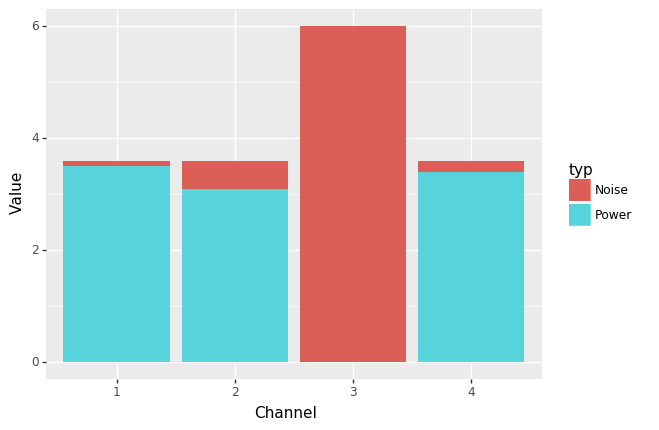

<ggplot: (8778905017245)>

In [56]:
(
    df_res
    >> gr.tf_row_slice(0)
    >> gr.tf_mutate(
        t1=DF.p1 + s1,
        t2=DF.p2 + s2,
        t3=DF.p3 + s3,
        t4=DF.p4 + s4,
    )
    >> gr.tf_select("t1", "t2", "t3", "t4", "p1", "p2", "p3", "p4")
    >> gr.tf_gather("key", "value", ["t1", "t2", "t3", "t4", "p1", "p2", "p3", "p4"])
    >> gr.tf_mutate(
        idx=gr.str_extract(DF.key, "\d"),
        typ=gr.str_extract(DF.key, "\w"),
    )
    >> gr.tf_mutate(typ=gr.str_replace(DF.typ, "t", "Noise"))
    >> gr.tf_mutate(typ=gr.str_replace(DF.typ, "p", "Power"))
    
    >> ggplot(aes("idx", "value"))
    + geom_col(aes(fill="typ"), position="identity")
    + labs(
        x="Channel",
        y="Value",
    )
)

Using the water filling analogy, this looks kind of like a rock sticking out our lake; there's no value in filling in that part of the lake, as the channel is just too noisy to pay off.
